<h1>Cohort analysis of an e-commerce company</h1>

<h4>1.1 Import libraries</h4>

In [295]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

<h4>1.2 Import database</h4>

In [296]:
df = pd.read_csv('data/Online_Sales.csv')
df.tail()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
52919,14410,48493,12/31/2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked
52920,14410,48494,12/31/2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used
52921,14410,48495,12/31/2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used
52922,14600,48496,12/31/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked
52923,14600,48497,12/31/2019,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


<h4>2.1 Convert date column to datetime and create a new column for the month, which will be what I'll use in this analysis</h4>

In [298]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%m/%d/%Y')
df['Transaction_Month'] = df['Transaction_Date'].dt.strftime('%m').astype('Int64')
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1


<h4>2.2 Create a Cohort Month Column, which registers the first month a customer appears in the db</h4>

In [299]:
df['Cohort_Month'] = df.groupby('CustomerID')['Transaction_Month'].transform('min')
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Cohort_Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,1
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,1
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,1
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,1


<h4>2.3 Create the Cohort Index column, which show how many months it has been since the customer's first appearence in the db</h4>

In [300]:
df['Cohort_Index'] = df['Transaction_Month'] - df['Cohort_Month'] + 1
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Cohort_Month,Cohort_Index
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,1,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,1,1
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,1,1
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,1,1
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,1,1


<h4>3.1 Create a pivot table containing the Cohort month and index for each costumer</h4>

In [369]:
cohort_data = df.groupby(['Cohort_Month', 'Cohort_Index'])['CustomerID'].nunique().reset_index()
cohort_data

,Cohort_Month,Cohort_Index,CustomerID
0,1,1,215
1,1,2,13
2,1,3,24
3,1,4,34
4,1,5,23
...,...,...,...
73,10,2,6
74,10,3,4
75,11,1,68
76,11,2,7


In [302]:
cohort_data = cohort_data.pivot(index='Cohort_Month', columns='Cohort_Index', values='CustomerID')
cohort_data

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,
1,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
3,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
4,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
5,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
6,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
7,94.0,13.0,4.0,6.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
8,135.0,14.0,15.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4>3.2 Convert the months from numbers to their names for easier reading and comprehension</h4>

In [303]:
cohort_data.index = cohort_data.index.map(lambda x: calendar.month_name[x])
cohort_data

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,
January,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
February,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
March,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
April,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
May,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
June,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
July,94.0,13.0,4.0,6.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
August,135.0,14.0,15.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>4.1 Grapic Representation</h3>

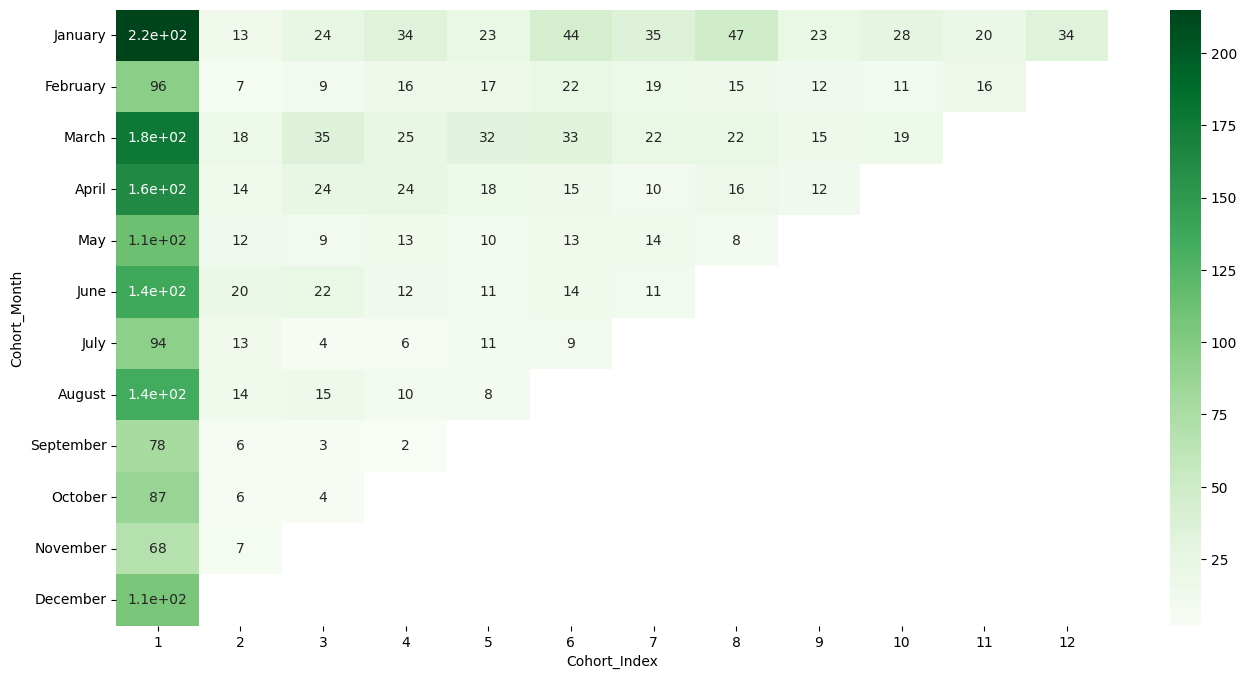

In [318]:
plt.figure(figsize=(16,8))
sns.heatmap(cohort_data, annot=True, cmap='Greens');

<h3>4.2 Convert the results to percentages and improve the graphic</h3>

In [320]:
cohort_percentage = cohort_data.divide(cohort_data.iloc[:,0], axis=0)
cohort_percentage

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,
January,1.0,0.060465,0.111628,0.158140,0.106977,0.204651,0.162791,0.218605,0.106977,0.130233,0.093023,0.15814
February,1.0,0.072917,0.093750,0.166667,0.177083,0.229167,0.197917,0.156250,0.125000,0.114583,0.166667,NaN
March,1.0,0.101695,0.197740,0.141243,0.180791,0.186441,0.124294,0.124294,0.084746,0.107345,NaN,NaN
April,1.0,0.085890,0.147239,0.147239,0.110429,0.092025,0.061350,0.098160,0.073620,NaN,NaN,NaN
May,1.0,0.107143,0.080357,0.116071,0.089286,0.116071,0.125000,0.071429,NaN,NaN,NaN,NaN
June,1.0,0.145985,0.160584,0.087591,0.080292,0.102190,0.080292,NaN,NaN,NaN,NaN,NaN
July,1.0,0.138298,0.042553,0.063830,0.117021,0.095745,NaN,NaN,NaN,NaN,NaN,NaN
August,1.0,0.103704,0.111111,0.074074,0.059259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September,1.0,0.076923,0.038462,0.025641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


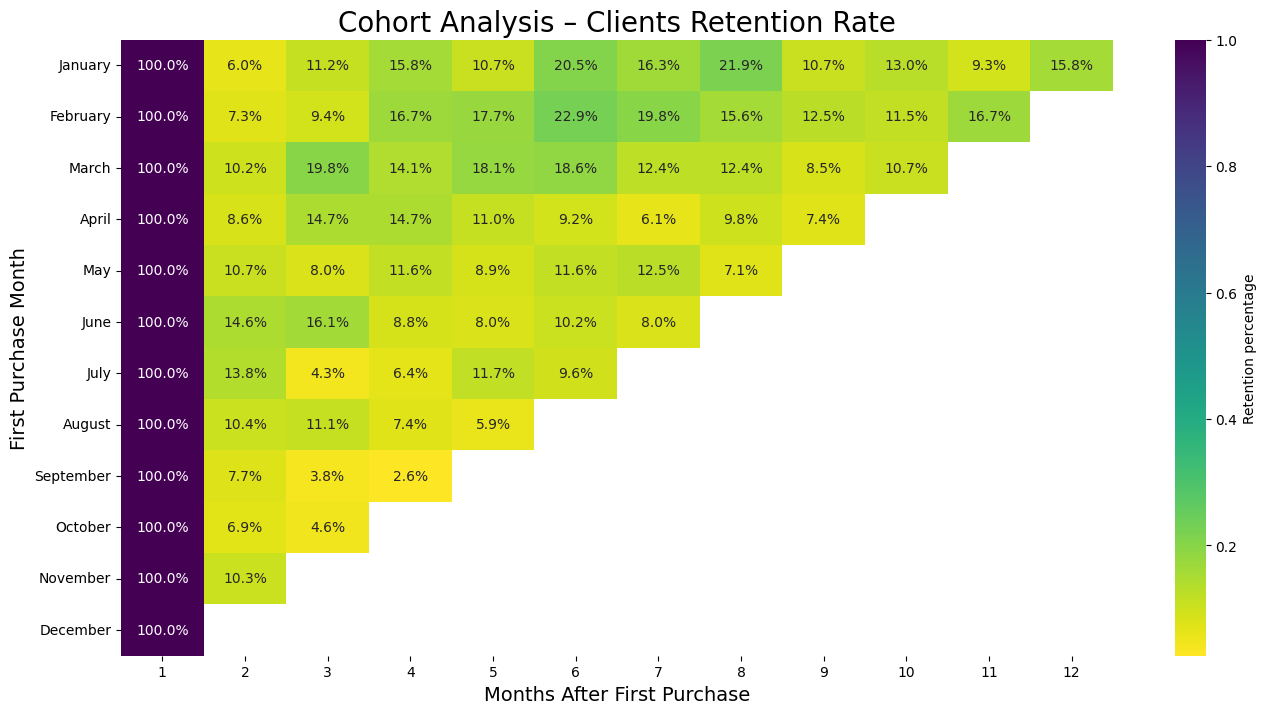

In [375]:
plt.figure(figsize=(16,8))
plt.title('Cohort Analysis – Clients Retention Rate', fontsize=20)
sns.heatmap(cohort_percentage, annot=True, cmap='viridis_r', fmt='.1%', cbar_kws={'label': 'Retention percentage'})
plt.xlabel("Months After First Purchase", fontsize=14)
plt.ylabel("First Purchase Month", fontsize=14)
plt.show()

<h1>Conclusion</h1>

In [374]:
for product in (df['Product_Description'].unique()[:20]):
    print(product)

Nest Learning Thermostat 3rd Gen-USA - Stainless Steel
Google Laptop and Cell Phone Stickers
Google Men's 100% Cotton Short Sleeve Hero Tee Black
Google Canvas Tote Natural/Navy
Sport Bag
Google 22 oz Water Bottle
Google Infuser-Top Water Bottle
Engraved Ceramic Google Mug
Maze Pen
Galaxy Screen Cleaning Cloth
Badge Holder
YouTube Men's Short Sleeve Hero Tee Black
Nest Cam Outdoor Security Camera - USA
Nest Protect Smoke + CO White Wired Alarm-USA
Google Men's 100% Cotton Short Sleeve Hero Tee Red
Google Women's Short Sleeve Hero Tee White
Red Shine 15 oz Mug
Compact Selfie Stick
Ballpoint LED Light Pen
Color Changing Grip Pen
